In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import scipy.optimize as op
import random

In [2]:
from PIL import Image

### [scipy.io 官方文档](https://docs.scipy.org/doc/scipy/reference/tutorial/io.html)

In [3]:
# x 为二维 array 类型，其中每一行的400个元素都是 20x20 的图像的灰度值，要先将每行的400元素按列reshape成(20, 20)，即 .reshape((20, 20)).T
data = sio.loadmat("ex3data1.mat")   # 读取 .mat文件，data 的类型是字典
x = data['X']                        #读取字典中键（key）为 'X' 的值（value），整体为 np.ndarray 类型
y = data['y'].ravel()                #读取字典中键（key）为 'y' 的值（value），reshape成一维array
print(x.min(), x.max(), x.shape, y.shape)

-0.13196323019852488 1.127688299158888 (5000, 400) (5000,)


ex3data1.mat 中有5000个训练示例, 其中每个训练示例是数字的20像素乘20像素灰度图像。每个像素都由一个浮点数表示, 该浮点数指示该位置的灰度强度。20 x 20 网格的像素被**按列** "展开" 成一个一行400像素的矢量。
这些训练示例中的每一个都成为数据矩阵 x 中的一行。这给了我们5000乘400矩阵 x, 其中每一行都是手写数字图像的训练示例。
（There are 5000 training examples in ex3data1.mat, where each training example is a 20 pixel by 20 pixel grayscale image of the digit. Each pixel is represented by a ﬂoating point number indicating the grayscale intensity at that location. The 20 by 20 grid of pixels is “unrolled” into a 400-dimensional vector. Each of these training examples becomes a single row in our data matrix X. This gives us a 5000 by 400 matrix X where every row is a training example for a handwritten digit image. ）

order : {'C', 'F', 'A'}, optional

- 'C'：该索引顺序读取/写入元素时, 最后一个轴索引变化最快, 第一个轴索引变化最慢。（二维时，列轴`axix = 1`索引变化最快，即行主序，一行一行的）
- 'F'：该索引顺序读取/写入元素时, 第一个轴索引变化最快, 最后一个轴索引变化最慢。（二维时，行轴`axis = 0`索引变化最快，即列主序，一列一列的）

（注意：元素在内存中的存储顺序不因其索引顺序 'C' 或 'F' 而改变）
- 'A'：按照元素在内存中存储的顺序与索引顺序的一致性使用 'C' 或者 'F'

In [15]:
# 从 x 中随机选择100行，将每行的400像素按列主序映射成20x20像素的灰度图像, 并将图像显示在一起。
r = np.random.randint(0, 5000, 100)  # 或者 r = [random.randint(0,5000) for i in range(100)]
ls = []
out = np.zeros((20, 20))
for i in range(100):                 # 注意转置，因为reshape默认是行主序的，而原本的20x20像素是一列列的变成一行400像素的
    out = np.hstack((out, x[r[i], :].reshape((20, 20)).T))  # 或者 .reshape((20, 20), order = 'F')
    if i%10 == 9:
        ls.append(out)
        out = np.zeros((20, 20))
res = np.zeros((20, 220))
for i in range(10):
    res = np.vstack((res, ls[i]))
res = res[20:, 20:]
print(res.shape)

(200, 200)


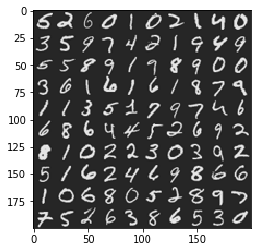

In [49]:
im1 = Image.fromarray((res + 0.2)*190)   #将数组转换为图像对象，灰度值归一到0-255的范围
im = im1.convert("L")                    #转换为灰度图像对象
plt.figure(figsize = (4, 4))
plt.imshow(im)
#im.show()
#im.save("num.png")
#print(type(im1))

In [27]:
print(im.format, im.size, im.mode)

None (200, 200) L


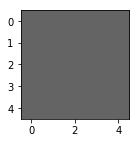

In [35]:
a = Image.new('L', (5, 5), 100)
plt.figure(figsize = (2, 2))
plt.imshow(a)

In [43]:
b = np.array(im1.getdata())
c = np.array(im.getdata())
print((b == c).all())
print(b.dtype, c.dtype)

False
float64 int32


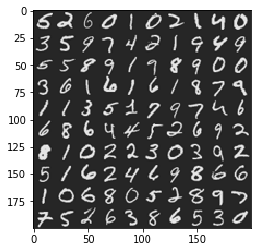

In [31]:
I = Image.fromarray(np.array(im1.getdata()).reshape((200,200)))  # getdata()是一行一行读取像素值的
#I1 = I.convert("L")
plt.imshow(I)

### Vectorizing Logistic Regression
- Vectorizing the cost function
- Vectorizing the gradient
- Vectorizing regularized logistic regression

### One-vs-all Classiﬁcation
- One-vs-all Prediction

In [226]:
m = x.shape[0]         # m: 训练集 x 的行数，即 number of training examples
n = x.shape[1]         # n: 一个训练数据的特征数，即 number of features
num_labels = 10        # 类别标签个数，即 number of multi-class labels
lam = 0.1                # 正则化因子lambda，即 regularization parameter
X = np.hstack((np.ones([m, 1]), x))
all_theta = np.zeros([n + 1, num_labels])    # 每一列theta是其中一个类别的参数
print(X.shape, all_theta.shape)

(5000, 401) (401, 10)


In [227]:
# Sigmoid function
def sigmoid(z):
    g = 1/(1 + np.exp(-z))
    return g

In [228]:
# Regularized cost function
def IrCostFunction(theta, X, y, lam):
    m = X.shape[0]
    h = sigmoid(np.dot(X,theta))
    J = np.sum(( 0 - y * np.log(h) - (1-y) * np.log(1-h)))/m + (lam/(2*m))*np.sum(theta[1:]**2)
    return J

In [229]:
IrCostFunction(all_theta[:, 0], X, (y==0), lam)

0.6931471805599454

In [230]:
# Gradient function
def gradient(theta, X, y, lam):
    m = X.shape[0]
    h = sigmoid(np.dot(X, theta))
    grad = (1/m) * np.dot((h - y), X[:,0])      # j = 0 时即theta[0]不需要正则化
    grad = np.append(grad, (1/m) * np.dot((h - y), X[:, 1:]) + (lam/m) * theta[1:])
    return grad

In [231]:
gradient(all_theta[:, 0], X, (y==10), lam).shape

(401,)

In [232]:
# One-vs-all Classification
result = op.minimize(fun = IrCostFunction, x0 = all_theta[:, 0], args = (X, (y==10), lam), method = 'TNC', jac = gradient)
all_theta[:, 0] = result.x
for i in range(1, num_labels):
    result = op.minimize(fun = IrCostFunction, x0 = all_theta[:, i], args = (X, (y==i), lam), method = 'TNC', jac = gradient)
    #print(result)
    all_theta[:, i] = result.x

In [233]:
all_theta.shape

(401, 10)

a.argmax(axis=None, out=None): Return indices(index的复数) of the maximum values along the given axis.

In [234]:
# One-vs-all Prediction (法一)
p = np.zeros(m)
for i in range(m):
    h = sigmoid(np.dot(X[i,:], all_theta))
    index = h.argmax()
    if index == 0:
        p[i] = 10
    else:
        p[i] = index
pred = (p == y)
accuracy = np.sum(pred == 1)/5000 # 或者 accuracy = pred.sum()/5000
print("Training Set Accuracy: {:%}".format(accuracy))

Training Set Accuracy: 96.460000%


In [235]:
# One-vs-all Prediction (法二)
pred = 0
for i in range(m):
    h = sigmoid(np.dot(X[i,:], all_theta))
    index = h.argmax()         # 
    if index == 0:
        index = 10
        if index == y[i]:
            pred += 1
    else:
        if index == y[i]:
            pred += 1
accuracy = pred / 5000
print("Training Set Accuracy: {:%}".format(accuracy))

Training Set Accuracy: 96.460000%


### 2 Neural Networks
 - 2.1  Model representation
 - 2.2  Feedforward Propagation and Prediction


In [236]:
weight = sio.loadmat("ex3weights.mat")
theta1 = weight['Theta1']
theta2 = weight['Theta2']
print(theta1.shape, theta2.shape)

(25, 401) (10, 26)


In [237]:
# Feedforward Propagation
z2 = np.dot(X, theta1.T)
a2 = sigmoid(z2)
a2 = np.hstack((np.ones((a2.shape[0],1)), a2))
z3 = np.dot(a2, theta2.T)
a3 = sigmoid(z3)
print(a3.shape)

(5000, 10)


原"ex3weights.mat"中的数据是按照matlab中的矩阵的索引得到的Theta1和Theta2，故a3中的前500行的最大值在第10列（即matlab中的列索引10，映射为digit 0，而此时在python中的列索引为9），a3中的第二个500行的最大值在第1列（即matlab中的列索引1，python中的列索引0），以此类推。

In [238]:
# predict
def predict(a3, y):
    m = a3.shape[0]
    p = np.zeros(m)
    for i in range(m):
        index = a3[i, :].argmax()    # index 为 python 中的索引
        if index == 9:               # 对应于 matlab 中的列索引10，故此时 p[i] = 10
            p[i] = 10
        else:
            p[i] = index + 1         # python 中的索引比 matlab 中的索引少1，故需要 + 1 还原到matlab中的列索引
    pred = (p == y)
    accuracy = np.sum(pred == 1) / 5000
    return accuracy
print("Training Set Accuracy: {:%}".format(predict(a3, y)))

Training Set Accuracy: 97.520000%


In [48]:
help(im1.convert)

Help on method convert in module PIL.Image:

convert(mode=None, matrix=None, dither=None, palette=0, colors=256) method of PIL.Image.Image instance
    Returns a converted copy of this image. For the "P" mode, this
    method translates pixels through the palette.  If mode is
    omitted, a mode is chosen so that all information in the image
    and the palette can be represented without a palette.
    
    The current version supports all possible conversions between
    "L", "RGB" and "CMYK." The **matrix** argument only supports "L"
    and "RGB".
    
    When translating a color image to black and white (mode "L"),
    the library uses the ITU-R 601-2 luma transform::
    
        L = R * 299/1000 + G * 587/1000 + B * 114/1000
    
    The default method of converting a greyscale ("L") or "RGB"
    image into a bilevel (mode "1") image uses Floyd-Steinberg
    dither to approximate the original image luminosity levels. If
    dither is NONE, all non-zero values are set to 255 (whi